# HW04

In [1]:
import transforms as tr
import transforms_symbolic as st

import numpy as np
import sympy as sm
from IPython.display import display, Math
from sympy.physics.vector.printing import vlatex

from visualization import VizScene 

np.set_printoptions(precision=3)

## 2. 

Let $R$ represent a rotation of $90^o$ about $y_0$ followed by a rotation of $45^o$ about $z_1$

In [2]:
# Define rotation matrix R
R = tr.roty(np.pi/2) @ tr.rotz(np.pi/4)
R

array([[ 4.330e-17, -4.330e-17,  1.000e+00],
       [ 7.071e-01,  7.071e-01,  0.000e+00],
       [-7.071e-01,  7.071e-01,  6.123e-17]])

### (a) 
Find the equivalent axis/angle to represent $R$. Sketch the initial and final frames and the equivalent axis vector $r$.

In [3]:
# Define R in axis/angle
R_aa = tr.R2axis(R)
print('R in axis/angle:')
R_aa

R in axis/angle:


array([1.718, 0.357, 0.863, 0.357])

In [4]:
# check answer to make sure it's a unit vector:
R_aa[1]**2 + R_aa[2]**2 + R_aa[3]**2

np.float64(1.0)

Sketch of R:

In [5]:
# viz = VizScene()
# viz.add_frame(np.eye(4), label='origin')
# # viz.add_frame(tr.se3(R=R, p=np.array([0,0,0])), label='R')
# # viz.add_frame(T2_in_1, label='T2_in_1')

# viz.hold()

# viz.close_viz()

tr.se3(R=R, p=np.array([0,0,0]))

array([[ 4.330e-17, -4.330e-17,  1.000e+00,  0.000e+00],
       [ 7.071e-01,  7.071e-01,  0.000e+00,  0.000e+00],
       [-7.071e-01,  7.071e-01,  6.123e-17,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00]])

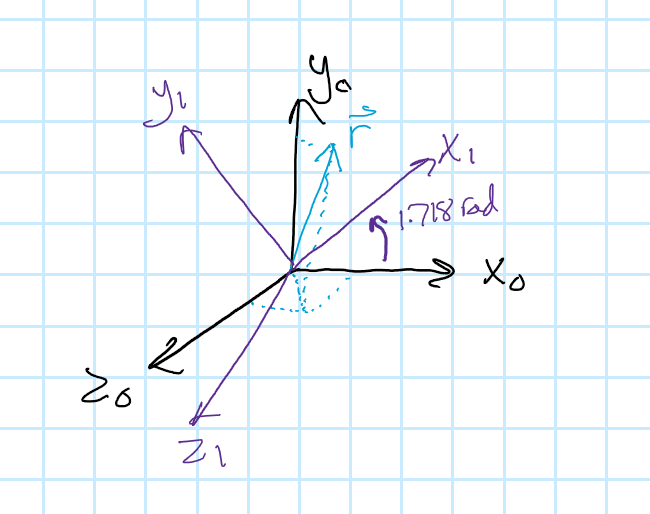

### (b)

Also find the equivalent quaternion representation.

In [6]:
R_q = tr.R2quat(R)
print('Quaternion representation of R:')
R_q

Quaternion representation of R:


array([0.653, 0.271, 0.653, 0.271])

## 3

I strongly suggest using SymPy for this problem, but it is not required. Using three variables to represent yaw, pitch, and roll angles, $(\psi, \theta, \phi)$, do the following (assuming a rotation about $z$, then $y$, then $x$ for current axis convention — this would be identical to a rotation about $x$, then $y$, then $z$ in a fixed frame convention):

### (a) 
Compute a rotation matrix (you may use code from the posted solution for HW02 for symbolic versions of ```rotx```, ```roty```, and ```rotz``` functions).

In [7]:
# compute rotation matrix
psi, theta, phi = sm.symbols(r'\psi \theta \phi', real=True)

R = st.rotz(psi) @ st.roty(theta) @ st.rotx(phi)
display(Math(r'R =' + vlatex(R)))

<IPython.core.display.Math object>

### (b)

Use this to transform a unit vector in the z-direction

In [8]:
# define vector z hat
z_hat = sm.Matrix([0,0,1])
display(Math(r'\hat z = ' + vlatex(z_hat)))

<IPython.core.display.Math object>

In [9]:
# compute the transform

print('Transformed unit vector in z direction:')
R @ z_hat

Transformed unit vector in z direction:


Matrix([
[ sin(\phi)*sin(\psi) + sin(\theta)*cos(\phi)*cos(\psi)],
[-sin(\phi)*cos(\psi) + sin(\psi)*sin(\theta)*cos(\phi)],
[                                 cos(\phi)*cos(\theta)]])

### (c)

Looking at the elements of the rotation matrix, devise an algorithm to determine the angles $(\psi, \theta, \phi)$. Hint – find the pitch angle first.

In [10]:
# Find theta by inspection, noticing that R_31 is only dependent on sin(theta)
theta2 = sm.asin( R[2,0] )

print('Find theta by inspection, noticing that R_31 is only dependent on sin(theta)')
display(Math(r'\theta = \arcsin (R_{31}) = '+ vlatex(theta2)))

Find theta by inspection, noticing that R_31 is only dependent on sin(theta)


<IPython.core.display.Math object>

In [11]:
# determine the other angles according to eq (2.22) in the textbook:

psi2 = sm.atan( R[1,0] / R[0,0] )
phi2 = sm.atan( R[2,1] / R[2,2] )

print('determine the other angles according to eq (2.22) in the textbook:')
display(Math(r'\psi = \arctan (R_{21}/R_{11}) =' + vlatex(psi2)))
display(Math(r'\phi = \arctan (R_{32}/R_{33}) =' + vlatex(phi2)))

determine the other angles according to eq (2.22) in the textbook:


<IPython.core.display.Math object>

<IPython.core.display.Math object>